### Chi-Square Test

In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

##### code Reference : 
 https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [2]:
def chi_square_goodness_of_fit_test(observed,expected,dof,prob=0.95):    
    stat,p = stats.chisquare(observed,expected)
    
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
            result = 'Reject Null Hypothesis H0'
    else:
        result = 'Fail to reject Null Hypothesis H0'
    result = f'{result} ,Chisquare statistic = {round(stat,3)},p-value {round(p,3)} ,Degreed of freedom\t: {dof}'
    return result

In [3]:
def chi_square_independency_test(observed_values,prob=0.95):
    """
    Chi_square independency test for the
    * observed values in a contingency table format
         [[10,20,30],
        [40,50,60]]
    * prob - probalitiy

    """
    stat, p, dof, expected = chi2_contingency(observed_values)
    print(f"Chisquare statistic \t: {round(stat,3)}")
    print(f"p-value \t\t: {round(p,3)}")
    print(f"Degreed of freedom\t: {dof}")
    print(f"\nExpected value\t\t:")
    print(expected)
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        result = 'From critical value : Dependent (reject H0)'
    else:
        result = 'From critical value : Independent (fail to reject H0)'
    
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        result2 = 'From significance : Dependent (reject H0)'
    else:
        result2 = 'From significance : Independent (fail to reject H0)'
    result = f'{result} ,Chisquare statistic = {round(stat,3)},p-value {round(p,3)} ,Degreed of freedom\t: {dof}'
    return result,result2

### Problem 1
1. A poker-dealing machine is supposed to deal cards at random, as if from an infinite deck.

In a test, you counted 1600 cards, and observed the following:
<pre>
Spades        404
Hearts        420
Diamonds      400
Clubs         376
</pre>

Could it be that the suits are equally likely ? Or are these discrepancies too much to be random ?

### Analysis:
In general, the distribution of cards in a deck of 1600 cards is 
<pre>
Type          Expected   Actual    difference
Spades        400        404        4
Hearts        400        420        20
Diamonds      400        400        0
Clubs         400        376        -24
</pre>
Since there are 4 types, and 3 of them can be independent, so degree of freedom is <b>3</b>
chi-square = sum (square of the differene/Expected)

           = 4^2/400 + 20^2/400 + 0^2/400 + (-24)^2/400
           = (16+400+0+576)/400
           = 992/400
           = 2.48
<b> Null Hypothesis: </b> The suits are equally likely, the observed values follows actual distribution

<b> Alternate Hypothesis: </b> The suits are random

From the chissquare-distribution, <b> critical value </b> for <b> significance of 0.05 </b> with <b> degree of freedom 1 </b> is : <b> 3.84</b>

since chisquare(2.48),it does not fall in critical region, Fail to Reject Null Hypothesis, 

<b> Answer </b>: Fail to reject Null Hypothesis, The suits are equally likely

In [4]:
#By programme
cards_expected = [400,400,400,400]
cards_actual = [404,420,400,376]
result = chi_square_goodness_of_fit_test(cards_actual,cards_expected,dof=3)
print(result)

Fail to reject Null Hypothesis H0 ,Chisquare statistic = 2.48,p-value 0.479 ,Degreed of freedom	: 3


### Problem 2
Same as before, but this time jokers are included, and you counted 1662 cards, with these results:-
<pre>
Spades        404
Hearts        420
Diamonds      400
Clubs         356
Jokers         82
</pre>
a) How many jokers would you expect out of 1662 random cards? How many of each suit?

b) Is it possible that the cards are really random ? Or are the discrepancies too large ? 

### Analysis:
In general, the distribution of cards in a deck of 1662 cards is 
In normal deck of cards, each type is of 13 and 2 jokers
so, out of 1662, total 400 each type and 62 jokers are expected
<pre>
Type          Expected   Actual    difference
Spades        400        404        4
Hearts        400        420        20
Diamonds      400        400        0
Clubs         400        356        -44
Jokers         62         82        20
</pre>
Since there are 5 types, and 4 of them can be independent, so degree of freedom is <b>4</b>
chi-square = sum (square of the differene/Expected)

           = 4^2/400 + 20^2/400 + 0^2/400 + (-44)^2/400 +(20^2)/62
           = (16+400+0+1936)/400+400/62
           = 12.33           
<b> Null Hypothesis: </b> The suits are equally likely, the observed values follows actual distribution

<b> Alternate Hypothesis: </b> The suits are random

From the chissquare-distribution, <b> critical value </b> for <b> significance of 0.05 </b> with <b> degree of freedom 4 </b> is : <b> 9.488</b>

since chisquare(12.33), greater than critical, it fall in  critical region, so Reject the null hypothesis

<b> Answer </b>: Reject the  Null Hypothesis, The suits are random, discrepancy is random

In [5]:
cards_expected = [400,400,400,400,62]
cards_actual = [404,420,400,356,82]
result = chi_square_goodness_of_fit_test(cards_actual,cards_expected,dof=4)
print(result)

Reject Null Hypothesis H0 ,Chisquare statistic = 12.332,p-value 0.015 ,Degreed of freedom	: 4


### Problem 3
A genetics engineer was attempting to cross a tiger and a cheetah. 
She predicted a phenotypic outcome of the traits she was observing to be in the following ratio
4 stripes only : 3 spots only : 9 both stripes and spots.
When the cross was performed and she counted the individuals she found 50 with stripes only,
41 with spots only and 85 with both.
According to the Chi-Square test, did she get the predicted outcome? 

### Analysis:
The ratio was given as 4:3:9
Observed values are : 50,41,85
Total observed values = 50 + 41 + 85 = 176
Expected values  = (4/16) * 176 , (3/16) * 176, (9/16) * 176 = 44,33,99

<pre>
Type          Expected     Actual    difference
Stripes only        44        50        6
spots   only        33        41        8
both                99        85        -14
</pre>
Since there are 3 types, and 2 of them can be independent, so degree of freedom is <b>2</b>
chi-square = sum (square of the differene/Expected)

           = (6^2/44 + 8^2/33 + (-14)^2/99)           
           = (36/44 + 64/33 + 196/99)    
           = 0.81 + 1.93 + 1.97
           = 4.71
<b> Null Hypothesis: </b> They are equally likely and predicted outcome follows expected

<b> Alternate Hypothesis: </b> The outcomes are random

From the chissquare-distribution, <b> critical value </b> for <b> significance of 0.05 </b> with <b> degree of freedom 2 </b> is : <b> 5.99</b>

since chisquare(4.73), less than  than critical, ,fail to reject the null hypothesis, and the observed values follow expected values

<b> Answer </b>: Fail to reject the null hypothesis, and the observed values follow expected values

In [6]:
#solving programatically
observed=[50,41,85]
expected = [44,33,99]
result = chi_square_goodness_of_fit_test(observed,expected,dof=2)
print(result)

Fail to reject Null Hypothesis H0 ,Chisquare statistic = 4.737,p-value 0.094 ,Degreed of freedom	: 2


### Problem 4
In the garden pea, yellow cotyledon color is dominant to green and inflated pod shape is dominant to the constricted form. Considering both of these traits jointly in self-fertilized dihybrids, the progeny appeared in the following numbers:-

193 green inflated , 184 yellow constricted , 556 yellow inflated , 61 green constricted

Do these genes assort independently? Support your answer using Chi-square analysis.

Note:- Genes assort independently  if they follow the 9:3:3:1 rule ( on the 16 square Punnett Square) resulting from a dihybrid cross

### Analysis:
The ratio was given as 9:3:3:1 , on 16 square
Observed values are : 193, 184,556,61 (green inflated,yellow constricted,yellow inflated,green constricted)
Total observed values = 193 + 184 + 556 + 61 = 994
Expected values  = (9/16) * 994 , (3/16) * 994, (3/16) * 994,(1/16) * 994 = 559.125,186.375,186.375,62.125

<pre>
            Type          Expected     Actual    difference (Actual - Expected)
    green inflated        559.125        556        -3.125
yellow constricted        186.375        193         6.625
yellow inflated           186.375        184        -2.375
green   constricted        62.125         61        -1.125
</pre>
Since there are 4 types, and 3 of them can be independent, so degree of freedom is <b>3</b>
chi-square = sum (square of the differene/Expected)

           = (-3.125^2)/559.125 + (6.625^2)/186.375 + (-2.375^2)/186.375 + (-1.125^2)/62.125           
           = 0.017 +  0.235 + 0.03 + 0.02
           = 0.30
           
<b> Null Hypothesis: </b> They are equally likely and predicted outcome follows expected

<b> Alternate Hypothesis: </b> The outcomes are random

From the chissquare-distribution, <b> critical value </b> for <b> significance of 0.05 </b> with <b> degree of freedom 3 </b> is : <b> 7.815</b>

since chisquare(0.30), less than  than critical, ,fail to reject the null hypothesis, and the observed values follow expected values

<b> Answer </b>: Fail to reject the null hypothesis, and the observed values follow expected values

In [7]:
#solving programatically
observed=[556,193,184,61]
expected = [559.125,186.375,186.375,62.125]
result = chi_square_goodness_of_fit_test(observed,expected,dof=3)
print(result)

Fail to reject Null Hypothesis H0 ,Chisquare statistic = 0.304,p-value 0.959 ,Degreed of freedom	: 3


### Problem 5 
5. A department store, A , has 4 competitors : B, C, D and E . Store A hires a consultant to determine if the percentage of shoppers who prefer each of the five stores is the same. A survey of 1100 randomly selected shoppers is conducted and the results about which one of the stores shoppers prefer are as below. Is there enough evidence using a significance level  α = 0.05 to conclude that the proportions are really the same?

<pre>
Store          A          B        C        D            E
shoppers       262        234      204      190          210
</pre>

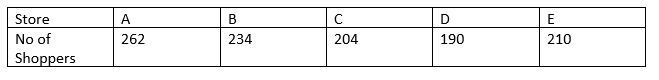

<b> Analysis </b>:
<pre>
Observed values = [262,234,204,190,210]
Expected is, preference is same for all 5 shoopers, so each of them be 1100/5 = 220
</pre>

<pre>
chi-square =14.6,
critical values = 9.48,
since chi-suare values is greater than critical, it falls under the tail, so rejecting null hypotheis
</pre>
<b> Answer </b> Rejecting null hypothesis, which means, proportions are not really same

In [8]:
# Solving programatically
observed= [262,234,204,190,210]
expected = [220,220,220,220,220]
result = chi_square_goodness_of_fit_test(observed,expected,dof=4)
print(result)

Reject Null Hypothesis H0 ,Chisquare statistic = 14.618,p-value 0.006 ,Degreed of freedom	: 4


### Problem 6
In the titanic Dataset, do a crosstab for embarked and survival rate. Using chi-square test, determine whether both of them are dependent or independent.

In [9]:
titanic = pd.read_csv(r'E:\SupervisedLearning\datasets\titanic.csv')

In [10]:
 pd.crosstab(titanic['Embarked'],titanic['Survived'],margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [11]:
observed = pd.crosstab(titanic['Embarked'],titanic['Survived']).values
observed

array([[ 75,  93],
       [ 47,  30],
       [427, 217]], dtype=int64)

<pre>
Expected value		:
[[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]
</pre>

In [12]:
observed=[75,47,427,93,30,217]
expected=[103.7,47.5,397.7,64.2,29.4,246.2]
stat,p = stats.chisquare(observed,expected)
stat,p

(26.501980716528983, 7.129904844595514e-05)

In [13]:
chi_value = ((103.7-75)**2/103.7)+((47.5-47)**2/47.5)+((397.7-427)**2/397.7)+((64.2-93)**2/64.2)+((30-29.4)**2/29.4)+((217-246.3)**2/246.3)
dof=2
prob=0.95
critical = chi2.ppf(prob,dof)
print(chi_value)
print(critical)

26.524326148664645
5.991464547107979


In [14]:
chi_square_independency_test(observed,0.95)

Chisquare statistic 	: 0.0
p-value 		: 1.0
Degreed of freedom	: 0

Expected value		:
[ 75.  47. 427.  93.  30. 217.]
significance=0.050, p=1.000


('From critical value : Independent (fail to reject H0) ,Chisquare statistic = 0.0,p-value 1.0 ,Degreed of freedom\t: 0',
 'From significance : Independent (fail to reject H0)')

### Problem7. 

Repeat the same experiment above with age bins and survival rate.

Note:- Age column and survival cannot be used for Chi-Square.



In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [17]:
titanic['Age_bins'] = pd.cut(titanic['Age'],10)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lbl = LabelEncoder()

In [20]:
titanic['Age_bins_encoded'] = lbl.fit_transform(titanic['Age_bins'])

In [21]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Age_bins_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 24.294]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,"(32.252, 40.21]",4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 32.252]",3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,"(32.252, 40.21]",4
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,"(32.252, 40.21]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,"(24.294, 32.252]",3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,"(16.336, 24.294]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,"(24.294, 32.252]",3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,"(24.294, 32.252]",3


In [22]:
pd.crosstab(titanic['Age_bins_encoded'],titanic['Survived'],margins=True)

Survived,0,1,All
Age_bins_encoded,,,
0,18,36,54
1,27,19,46
2,114,63,177
3,229,117,346
4,66,52,118
5,46,24,70
6,24,21,45
7,15,9,24
8,9,0,9


In [23]:
observed = pd.crosstab(titanic['Age_bins_encoded'],titanic['Survived']).values

In [24]:
chi_square_independency_test(observed)

Chisquare statistic 	: 31.209
p-value 		: 0.0
Degreed of freedom	: 9

Expected value		:
[[ 33.27272727  20.72727273]
 [ 28.34343434  17.65656566]
 [109.06060606  67.93939394]
 [213.19191919 132.80808081]
 [ 72.70707071  45.29292929]
 [ 43.13131313  26.86868687]
 [ 27.72727273  17.27272727]
 [ 14.78787879   9.21212121]
 [  5.54545455   3.45454545]
 [  1.23232323   0.76767677]]
significance=0.050, p=0.000


('From critical value : Dependent (reject H0) ,Chisquare statistic = 31.209,p-value 0.0 ,Degreed of freedom\t: 9',
 'From significance : Dependent (reject H0)')

<b> Answer </b>: The age and survival are dependent

# Doubts
<pre>
1) Need to get clarity on Problem 4
2) For Problem 6, is it really,Reject Null Hypothesis
3) How to do if we need signicance, other than 0.05 
4) how to do  two tailed chi-square test 
5) For age bins, imputed missing values with mean, is it fine

</pre>